In [1]:
import pandas as pd
data = pd.read_csv('./cleaned_data.csv')
data['Country'] = data['Country'].str.strip()

data.head(1)

,Country,Year_2008_2009,Year_2009_2010,Year_2010_2011,Year_2011_2012,Year_2012_2013,Year_2013_2014,Year_2014_2015,Year_2015_2016,Year_2016_2017,Year_2017_2018,Year_2018_2019,Year_2019_2020,Year_2020_2021,Year_2021_2022,Year_2022_2023,Year_2023_2024,Year_2024_2025
0,AFGHANISTAN,182344.16,220362.72,192084.0,242912.0,256914.0,287888.0,258130.0,343603.0,339682.0,457689.0,499237.0,708458.0,610620.0,412904.0,349498.0,294271.0,52979.0


In [32]:
summary = pd.DataFrame([{
    'Year': data.columns[i],  # Add this line to keep track of which year it is
    'Mean': data[data.columns[i]].mean(),
    'Median': data[data.columns[i]].median(),
    'Total Export': data[data.columns[i]].sum(),
} for i in range(1, len(data.columns))])

# Set 'Year' as the index
summary.set_index('Year', inplace=True)

summary


,Mean,Median,Total Export
Year,,,
Year_2008_2009,3.577681e+05,21960.15,8.407551e+07
Year_2009_2010,3.609881e+05,22875.58,8.483220e+07
Year_2010_2011,4.843002e+05,30483.00,1.138105e+08
Year_2011_2012,6.243478e+05,46042.00,1.467217e+08
Year_2012_2013,6.947072e+05,49983.00,1.632562e+08
Year_2013_2014,8.092640e+05,62445.00,1.901770e+08
Year_2014_2015,8.092987e+05,66259.00,1.901852e+08
Year_2015_2016,7.526840e+05,68977.00,1.768807e+08
Year_2016_2017,7.907963e+05,64368.00,1.858371e+08


In [33]:
n = 10 # Top_n countries

top_n_exports = []
for i in range(1, len(data.columns)):
    # Choose country and the specific year
    top_n = data.iloc[:, [0, i]].nlargest(n, data.columns[i])
    
    # Reset the old index
    top_n.reset_index(drop=True, inplace=True)
    top_n.index += 1
    
    # Add the result to our final results
    top_n_exports.append(top_n)
    
    
    
def get_top_n(year: int):
    
    # Find the index of the prompted year
    index = range(2009, 2026).index(year)
    return top_n_exports[index]


while True:
    year = int(input('Enter a year between 2009 and 2025: '))
    if 2009 <= year <= 2025:
        break
    print("Invalid year. Please try again.")


get_top_n(year)

,Country,Year_2008_2009
1,U ARAB EMTS,11022907.95
2,U S A,9645841.97
3,CHINA P RP,4266133.36
4,SINGAPORE,3775688.18
5,HONG KONG,3039069.39
6,U K,3034457.97
7,GERMANY,2919475.35
8,NETHERLAND,2888996.20
9,SAUDI ARAB,2294014.13
10,UNSPECIFIED,2031903.63


In [34]:
# Calculate the year-over-year percentage change for all columns except the first (country names)
growth_rates = data.iloc[:, 1:].pct_change(axis=1) * 100

# Concatenate the country names (first column) with the calculated growth rates
growth_rates = pd.concat([data.iloc[:, [0]], growth_rates], axis=1)

# Drop the first year since we don't have growth rate for it
growth_rates.drop(columns=growth_rates.columns[1], inplace=True)

growth_rates.head(8)

,Country,Year_2009_2010,Year_2010_2011,Year_2011_2012,Year_2012_2013,Year_2013_2014,Year_2014_2015,Year_2015_2016,Year_2016_2017,Year_2017_2018,Year_2018_2019,Year_2019_2020,Year_2020_2021,Year_2021_2022,Year_2022_2023,Year_2023_2024,Year_2024_2025
0,AFGHANISTAN,20.849892,-12.832806,26.461340,5.764227,12.056174,-10.336659,33.112385,-1.141143,34.740434,9.077780,41.908152,-13.809993,-32.379549,-15.356112,-15.801807,-81.996527
1,ALBANIA,-27.947117,29.781455,16.070404,56.848525,20.344683,3.597625,32.847269,12.378656,6.707317,36.730159,21.140005,10.586168,18.547618,587.356238,238.746716,-98.885173
2,ALGERIA,-8.652370,29.986548,12.210396,48.653658,8.685190,0.676729,-20.926146,9.903815,-5.963030,23.900304,-34.347078,1.881687,19.097110,-5.789221,42.364892,-82.935300
3,AMERI SAMOA,-30.569859,129.913473,948.387097,-79.589744,-84.422111,277.419355,-14.529915,-48.000000,284.615385,-91.000000,405.555556,375.824176,33.487298,-96.020761,14856.521739,-76.337209
4,ANDORRA,-76.601111,24.365219,4.166667,-52.800000,25.423729,110.810811,-50.641026,25.974026,3071.134021,-92.457737,-76.293103,-72.727273,146.666667,389.189189,44.751381,0.000000
5,ANGOLA,76.411824,1.822373,-27.942728,20.600185,22.804010,3.415061,-56.940604,-28.684681,45.930911,30.425275,2.284044,-4.852864,75.823821,47.771449,15.853348,-89.143080
6,ANGUILLA,-40.573770,231.896552,-29.870130,46.296296,-82.278481,114.285714,-66.666667,180.000000,1057.142857,-65.123457,-71.681416,18.750000,78.947368,-50.000000,547.058824,-91.363636
7,ANTARTICA,inf,61.866723,-59.740260,200.000000,-60.215054,-94.594595,-50.000000,3200.000000,96.969697,-96.923077,650.000000,5026.666667,-92.717815,50.000000,155.952381,-98.604651


In [35]:
# Initialize an empty list to store the mean growth rates
mean_growth_rates = []

# Iterate over each row in the growth_rates DataFrame
for i in range(len(growth_rates)):
    
    # Calculate the mean value while ignoring inf and -inf
    mean_value = growth_rates.iloc[i, 1:].replace([float('inf'), float('-inf')], float('nan')).mean()
    
    # Create a dictionary to store the country and its mean growth rate
    mean_growth_rate = {
        'Country': growth_rates.loc[i, 'Country'],
        'Mean': mean_value
    }
    
    # Append the dictionary to the list
    mean_growth_rates.append(mean_growth_rate)

# Convert the list of dictionaries into a DataFrame
mean_growth_rates_df = pd.DataFrame(mean_growth_rates)

C:\Windows\Temp\ipykernel_22424\2679734027.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mean_value = growth_rates.iloc[i, 1:].replace([float('inf'), float('-inf')], float('nan')).mean()


In [36]:
# top n countries with the largest mean growth rates
n = 10
n_largest_growth_rate = mean_growth_rates_df.nlargest(n, 'Mean')

# Reset the index and start from 1
n_largest_growth_rate.reset_index(drop=True, inplace=True)
n_largest_growth_rate.index += 1

# Display the top n countries with their mean growth rates
n_largest_growth_rate

,Country,Mean
1,FR S ANT TR,4.113386e+07
2,CHILE,1.534703e+07
3,NETHERLAND,5.721620e+06
4,RUSSIA,5.342390e+06
5,NIGER,4.374797e+06
6,U K,3.490055e+06
7,ESTONIA,2.936468e+06
8,JAMAICA,2.538668e+06
9,UGANDA,2.086873e+06
10,COCOS IS,1.946914e+06


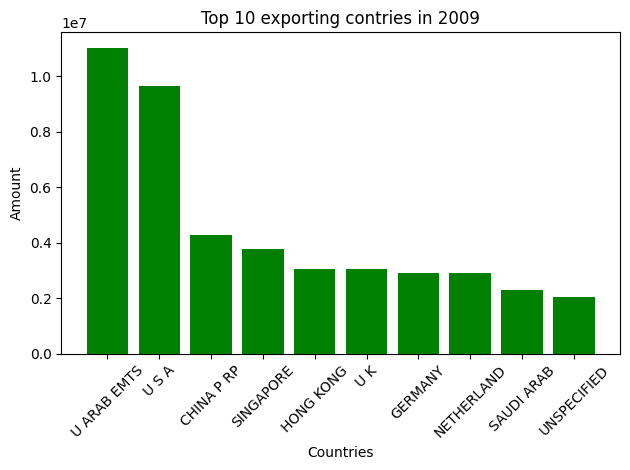

In [37]:
import matplotlib.pyplot as plt

while True:
    year = int(input('Enter a year between 2009 and 2025: '))
    if 2009 <= year <= 2025:
        break
    print("Invalid year. Please try again.")
    
top_n = get_top_n(year)

# Create the bar chart
plt.bar(top_n['Country'], top_n[f'Year_{year-1}_{year}'], color='green')

# Add titles and labels
plt.title(f'Top 10 exporting contries in {year}')
plt.xlabel('Countries')
plt.ylabel('Amount')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clippingplt.show()

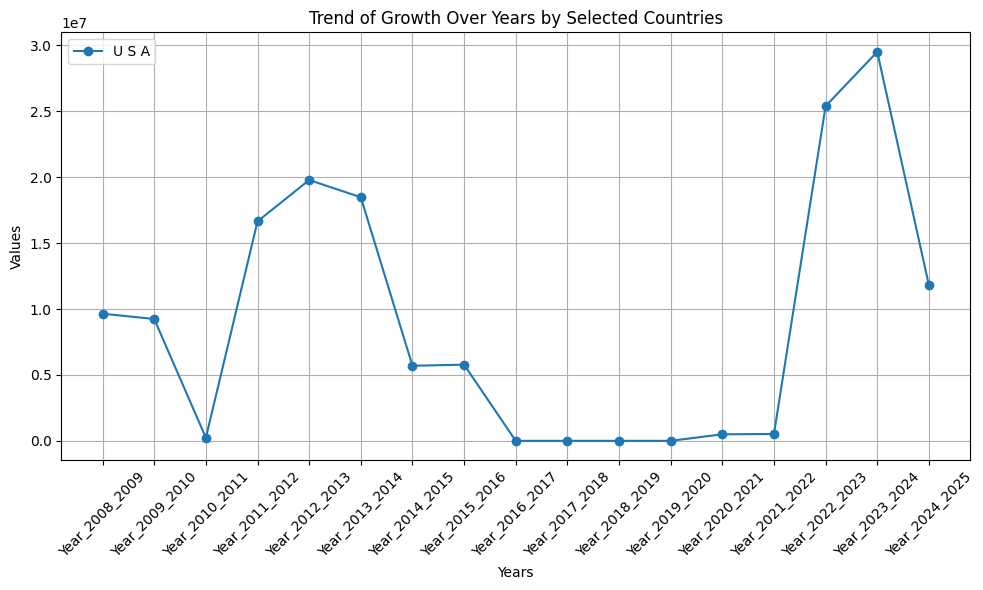

In [38]:
while True:
    # Get user input
    selected_countries = input('Enter country names for trend-line (separate them with "-"): ').split("-")

    # Check what countries are available in the DataFrame
    available_countries = data['Country'].tolist()

    # Check for valid countries
    valid_countries = [country.upper() for country in selected_countries if country.upper() in available_countries]

    if not valid_countries:
        print("No valid country names were found in the data. Enter Again")
    else:
        break
    
selected_data = data[data['Country'].isin(valid_countries)]

# Set the index to the 'Country' column
selected_data.set_index('Country', inplace=True)

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size
for country in selected_data.index:
    plt.plot(selected_data.columns, selected_data.loc[country], marker='o', label=country)

# Adding labels and title
plt.title('Trend of Growth Over Years by Selected Countries')
plt.xlabel('Years')
plt.ylabel('Values')
plt.legend()  # Show legend to identify countries
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.grid(True)  # Optional: add grid for better readability

# Show the plot
plt.show()


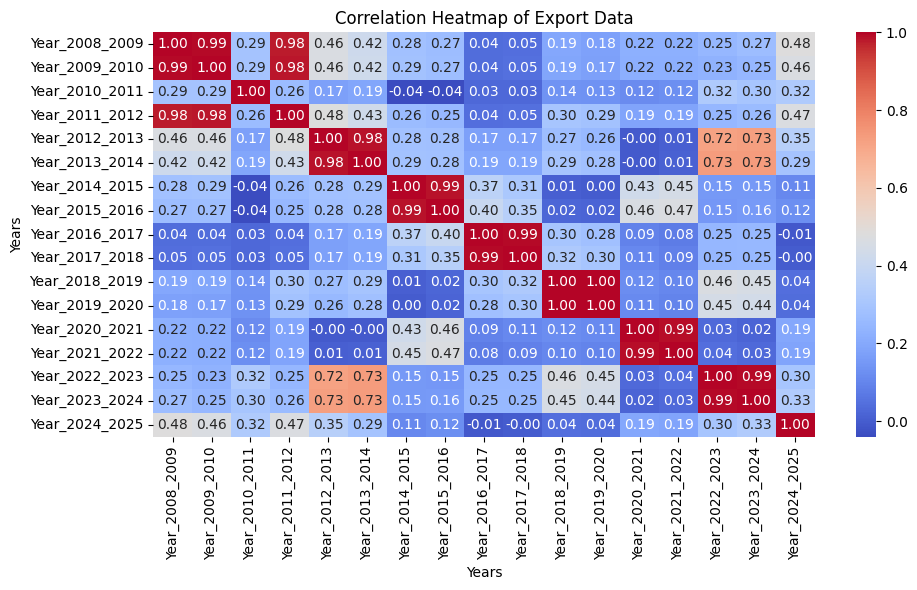

In [39]:
import seaborn as sns

# Create correlation matrix
corr_matrix = data.iloc[:, 1:].corr()
# Set the size of the heatmap
plt.figure(figsize=(10, 6))

# Generate the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Add titles and labels
plt.title('Correlation Heatmap of Export Data')
plt.xlabel('Years')
plt.ylabel('Years')

# Show the plot
plt.tight_layout()
plt.show()


In [46]:
def data_aggregation(selected_countries, period, data: pd.DataFrame):
    
    start = int(period[0])
    end = int(period[1])
    
    years = [f'Year_{i}_{i+1}' for i in range(start, end)]
    data = data[data['Country'].isin(selected_countries)]
    selected_period_data = data.loc[:, years]
    
    return selected_period_data.sum().sum()


# Get user input
selected_countries = input('Enter country names for trend-line (separate them with "-"): ').split("-")

period = input('Enter a period beteween 2009 and 2025').split("-")

# Check what countries are available in the DataFrame
available_countries = data['Country'].tolist()

# Check for valid countries
valid_countries = [country.upper() for country in selected_countries if country.upper() in available_countries]

if not valid_countries:
    print("No valid country names were found in the data. Enter Again")

else:
    total_export = data_aggregation(valid_countries, period, data=data)
    print(f'total_export for {'-'.join(valid_countries)} in {'-'.join(period)} is {total_export:,}')

total_export for AFGHANISTAN in 2010-2020 is 3,586,597.0
